## LangGraph
1. Nodes = Python Functions -> Task
2. Edges = Connect the nodes -> Conditional Edge
3. State = State Schema serves as the i/p for all nodes.
4. StateGraph = Structure of the centre Graph.


In [ ]:
from typing_extensions import TypedDict

class State(TypedDict):
    graph_info: str

In [2]:
def start_play(state: State) -> State:
    print("Starting Play node has been called...")
    return {"graph_info": state["graph_info"] + "I'm planning to play a game"}

def cricket(state: State) -> State:
    print("Cricket node has been called...")
    return {"graph_info": state["graph_info"] + "I'm going to play cricket"}

def badminton(state: State) -> State:
    print("Badminton node has been called...")
    return {"graph_info": state["graph_info"] + "I'm going to play badminton"}

In [3]:
import random
from typing import Literal

def random_play(state: State) -> Literal["cricket", "badminton"]:
    if random.random() > 0.5:
        return "cricket"
    else:
        return "badminton"

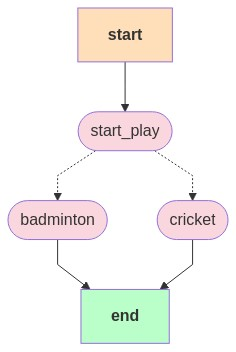

In [4]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

## Build the graph
graph = StateGraph(State)

graph.add_node("start_play", start_play)
graph.add_node("cricket", cricket)
graph.add_node("badminton", badminton)

## Schedule the flow of the graph
graph.add_edge(START, "start_play")
graph.add_conditional_edges(
    "start_play", random_play
)
graph.add_edge("cricket", END)
graph.add_edge("badminton", END)

## Create the graph
graph_builder = graph.compile()

## Visualize the graph
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [5]:
graph_builder.invoke({"graph_info": "I'm planning to play a game"})

KeyError: '__start__'